## Import the neccessary libararies

In [6]:
import pandas as pd
import numpy as np

### Load the clean dataset

In [7]:
train = pd.read_csv("train_clean.csv")
train.head()

,HDB BRANCH STATE_0,HDB BRANCH STATE_1,HDB BRANCH STATE_2,HDB BRANCH STATE_3,HDB BRANCH STATE_4,mobile,Cibil Score,TOTAL ASSET COST,ASSET CTG_0,ASSET CTG_1,...,Phone Social Premium.flipkart,Phone Social Premium.instagram,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.skype,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall,Application Status
0,0,0,0,0,1,9210574080,3.0,95041.0,0,0,...,1.0,NaN,0.0,1.0,0.0,1.0,5324.0,67.222222,3.0,1
1,0,0,0,1,0,8877987018,NaN,NaN,0,1,...,1.0,NaN,0.0,1.0,0.0,0.0,1998.0,100.000000,3.0,1
2,0,0,0,1,1,8910862135,3.0,119436.0,0,1,...,1.0,NaN,0.0,0.0,0.0,0.0,-1.0,-1.000000,1.0,1
3,0,0,1,0,0,9758428017,3.0,87000.0,0,1,...,1.0,1.0,0.0,1.0,0.0,1.0,1998.0,72.777778,3.0,1
4,0,0,1,0,1,9687028486,3.0,NaN,0,1,...,0.0,1.0,0.0,1.0,0.0,1.0,1998.0,68.095238,3.0,0


## Evaluate Model on Different experiments

In [8]:
# Splitting X and y for all Experiments
X= train.drop(columns=['Application Status'], axis=1)
y = train['Application Status']

In [9]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00


In [10]:
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

###Experiment: 1 = KNN Imputer for Null values
**Why Robust scaler and not Standard scaler?**

* Scaling the data using Robust scaler
* Since most of the independent variables are not normally distributed we cannot use Standardscaler

**Why Robust Scaler and not Minmax?**

* because most of the feature has outliers. So Minmax will scale data according to Max values which is outlier.
* This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [11]:
# Fit with robust scaler for KNN best K-selection experminet
robustscaler = RobustScaler()
X1 = robustscaler.fit_transform(X)

## Create Functions for model training and evaluation

In [12]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [13]:
def evaluate_models(X, y, models):
    '''
    This function takes in X (features), y (target), and a dictionary of models as input.
    It splits the data into Train/Test sets, iterates through the given model dictionary,
    evaluates the metrics, and returns a DataFrame report with metrics for all models.
    Returns: DataFrame with model names and their performance metrics, sorted by Accuracy.
    '''
    # Split dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Lists to store performance metrics
    models_list = []
    accuracy_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    roc_auc_list = []

    # Iterate through each model in the models dictionary
    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate model on test set
        model_test_accuracy, model_test_f1, model_test_precision, model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        # Store results
        models_list.append(model_name)
        accuracy_list.append(model_test_accuracy)
        f1_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        roc_auc_list.append(model_test_rocauc_score)

        # Print the results
        print(f'Model: {model_name}')
        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')

    # Create a report DataFrame with all the performance metrics
    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC': roc_auc_list
    }).sort_values(by=["Accuracy"], ascending=False)

    return report

#### Why KNN Imputer?

* KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.
* KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.
* Here we Iterates through different K values and get accuracy and choose best K values.

### Finding the optimal n_neighbour value for KNN imputer

In [14]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X1, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.8350)
n_neighbors= 3 || accuracy (0.8371)
n_neighbors= 5 || accuracy (0.8368)
n_neighbors= 7 || accuracy (0.8356)
n_neighbors= 9 || accuracy (0.8353)


**We can observe n_neighbors=3 able to produce highest accuracy**

## Pipeline for KNN imputer

In [15]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('RobustScaler', RobustScaler())
])

## Handling Imbalanced data
**SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

* This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

* To add new data of minority class

1. Choose random data from the minority class.
2. Calculate the distance between the random data and its k nearest neighbors.
3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
4. Repeat step number 2–3 until the desired proportion of minority class is met.

* To remove the tomek links of the majority class

1. Choose random data from the majority class.
2. If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.

This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [16]:
X_knn =knn_pipeline.fit_transform(X)

In [17]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

### Initialize Default Models in a dictionary

In [18]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

### Fit KNN imputed data for models in dictionary

In [19]:
report_knn = evaluate_models(X_res, y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8832
- F1 score: 0.8738
- Precision: 0.9675
- Recall: 0.7967
- Roc Auc Score: 0.8845


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8533
- F1 score: 0.8537
- Precision: 0.8648
- Recall: 0.8429
- Roc Auc Score: 0.8535


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8858
- F1 score: 0.8782
- Precision: 0.9578
- Recall: 0.8109
- Roc Auc Score: 0.8870


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8673
- F1 score: 0.8536
- Precision: 0.9706
- Recall: 0.7617
- Roc Auc Score: 0.8690


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8669
- F1 score: 0.8531
- Precision: 0.9706
- Recall: 0.7610
- Roc Auc Score: 0.8686


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8813
- F1 score: 0.8786
- Precision: 0.9139
- Recall: 0.8459
- Roc Auc Score: 0.8818


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for KNN Imputed data

In [20]:
report_knn

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
6,CatBoosting Classifier,0.888847,0.884069,0.939648,0.834698,0.889699
2,Gradient Boosting,0.885822,0.878226,0.957784,0.810871,0.887002
7,AdaBoost Classifier,0.883554,0.876106,0.952756,0.810871,0.884698
0,Random Forest,0.883176,0.873826,0.967450,0.796724,0.884537
5,XGBClassifier,0.881285,0.878577,0.913918,0.845867,0.881843
3,Logistic Regression,0.867297,0.853567,0.970588,0.761727,0.868959
4,K-Neighbors Classifier,0.866919,0.853088,0.970560,0.760983,0.868587
1,Decision Tree,0.853308,0.853695,0.864782,0.842889,0.853472


## Experiment: 2 = Simple Imputer with Strategy Median

* SimpleImputer is a class in the `sklearn.impute` module that can be used to replace missing values in a dataset, using a variety of input strategies.
* Here we use SimpleImputer can also be used to impute multiple columns at once by passing in a list of column names. SimpleImputer will then replace missing values in all of the specified columns.

In [21]:
num_features = X.select_dtypes(exclude="object").columns

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [22]:
# Fit X with median_pipeline
X_median = median_pipeline.fit_transform(X)

In [23]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority')
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_median, y)

In [24]:
# Training the models
report_median = evaluate_models(X_res, y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8944
- F1 score: 0.8830
- Precision: 0.9768
- Recall: 0.8057
- Roc Auc Score: 0.8935


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8441
- F1 score: 0.8441
- Precision: 0.8352
- Recall: 0.8531
- Roc Auc Score: 0.8442


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8865
- F1 score: 0.8747
- Precision: 0.9632
- Recall: 0.8011
- Roc Auc Score: 0.8856


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8710
- F1 score: 0.8565
- Precision: 0.9514
- Recall: 0.7789
- Roc Auc Score: 0.8700


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8763
- F1 score: 0.8611
- Precision: 0.9676
- Recall: 0.7758
- Roc Auc Score: 0.8752


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8785
- F1 score: 0.8721
- Precision: 0.9101
- Recall: 0.8370
- Roc Auc Score: 0.8781


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for Simple Imputer with median strategy

In [25]:
report_median

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Random Forest,0.894438,0.883019,0.976809,0.805662,0.893475
2,Gradient Boosting,0.886493,0.874687,0.963201,0.801071,0.885566
6,CatBoosting Classifier,0.886493,0.878247,0.935177,0.827850,0.885856
7,AdaBoost Classifier,0.882709,0.870726,0.956920,0.798776,0.881798
5,XGBClassifier,0.878547,0.872061,0.910150,0.837031,0.878097
4,K-Neighbors Classifier,0.876277,0.861146,0.967557,0.775822,0.875187
3,Logistic Regression,0.870980,0.856542,0.951402,0.778883,0.869980
1,Decision Tree,0.844117,0.844058,0.835206,0.853099,0.844214


## Experiment: 3 = MICE for Imputing Null values

* MICE stands for Multivariate Imputation By Chained Equations algorithm
* This technique by which we can effortlessly impute missing values in a dataset by looking at data from other columns and trying to estimate the best prediction for each missing value.
* `ImputationKernel` Creates a kernel dataset. This dataset can perform MICE on itself, and impute new data from models obtained during MICE.

In [28]:
!pip install miceforest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.0 MB/s eta 0:00:00


In [29]:
import miceforest as mf

X_mice = X.copy()
kernel = mf.ImputationKernel(
  X_mice,
  # save_all_iterations=True,
  random_state=1989
)# Run the MICE algorithm for 3 iterations kernel.mice(3)

In [30]:
X_mice = kernel.complete_data()

In [31]:
# fit robust scaler
mice_pipeline = Pipeline(steps=[
    ('RobustScaler', RobustScaler())
])

In [32]:
# Fit X with Mice imputer
X_mice= mice_pipeline.fit_transform(X_mice)

In [34]:
# Training the models
report_mice = evaluate_models(X_res, y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8907
- F1 score: 0.8791
- Precision: 0.9696
- Recall: 0.8041
- Roc Auc Score: 0.8897


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8453
- F1 score: 0.8447
- Precision: 0.8386
- Recall: 0.8508
- Roc Auc Score: 0.8453


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8865
- F1 score: 0.8747
- Precision: 0.9632
- Recall: 0.8011
- Roc Auc Score: 0.8856


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8710
- F1 score: 0.8565
- Precision: 0.9514
- Recall: 0.7789
- Roc Auc Score: 0.8700


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8763
- F1 score: 0.8611
- Precision: 0.9676
- Recall: 0.7758
- Roc Auc Score: 0.8752


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8785
- F1 score: 0.8721
- Precision: 0.9101
- Recall: 0.8370
- Roc Auc Score: 0.8781


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for MICE Imputer algorithm

In [35]:
report_mice

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Random Forest,0.890655,0.879130,0.969557,0.804132,0.889716
2,Gradient Boosting,0.886493,0.874687,0.963201,0.801071,0.885566
6,CatBoosting Classifier,0.886493,0.878247,0.935177,0.827850,0.885856
7,AdaBoost Classifier,0.882709,0.870726,0.956920,0.798776,0.881798
5,XGBClassifier,0.878547,0.872061,0.910150,0.837031,0.878097
4,K-Neighbors Classifier,0.876277,0.861146,0.967557,0.775822,0.875187
3,Logistic Regression,0.870980,0.856542,0.951402,0.778883,0.869980
1,Decision Tree,0.845252,0.844664,0.838612,0.850803,0.845312


## Experiment: 4 = Simple Imputer with Strategy Constant
* Another strategy which can be used is replacing missing values with a fixed (constant) value.
* To do this, specify “constant” for strategy and specify the fill value using the fill_value parameter

In [36]:
# Create a pipeline with simple imputer with strategy constant and fill value 0
constant_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [37]:
X_const =constant_pipeline.fit_transform(X)

In [38]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [39]:
# training the models
report_const = evaluate_models(X_res, y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8817
- F1 score: 0.8735
- Precision: 0.9616
- Recall: 0.8001
- Roc Auc Score: 0.8834


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8570
- F1 score: 0.8597
- Precision: 0.8613
- Recall: 0.8581
- Roc Auc Score: 0.8570


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8832
- F1 score: 0.8759
- Precision: 0.9569
- Recall: 0.8076
- Roc Auc Score: 0.8848


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8646
- F1 score: 0.8481
- Precision: 0.9920
- Recall: 0.7407
- Roc Auc Score: 0.8673


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8627
- F1 score: 0.8495
- Precision: 0.9642
- Recall: 0.7593
- Roc Auc Score: 0.8649


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8824
- F1 score: 0.8803
- Precision: 0.9164
- Recall: 0.8470
- Roc Auc Score: 0.8832


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for Simple Imputer with Constant strategy

In [40]:
report_const

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
6,CatBoosting Classifier,0.886234,0.881983,0.937291,0.832838,0.887372
2,Gradient Boosting,0.883201,0.875907,0.956866,0.807578,0.884811
5,XGBClassifier,0.882442,0.880309,0.916399,0.846954,0.883198
0,Random Forest,0.881684,0.873479,0.961607,0.800149,0.883421
7,AdaBoost Classifier,0.879788,0.871504,0.958965,0.798663,0.881516
3,Logistic Regression,0.864619,0.848150,0.992040,0.740713,0.867258
4,K-Neighbors Classifier,0.862723,0.849543,0.964151,0.759287,0.864926
1,Decision Tree,0.857035,0.859695,0.861298,0.858098,0.857012


## Experiment: 5 = Simple Imputer with Strategy Mean

* Another strategy which can be used is replacing missing values with mean
* Here we replace the missing values with the mean of the column

In [41]:
# Create a pipeline with Simple imputer with strategy mean
mean_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='mean')),
    ('RobustScaler', RobustScaler())
])

In [42]:
X_mean = mean_pipeline.fit_transform(X)

In [43]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_mean, y)

In [44]:
# Training all models
report_mean = evaluate_models(X_res, y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8906
- F1 score: 0.8787
- Precision: 0.9527
- Recall: 0.8154
- Roc Auc Score: 0.8886


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8489
- F1 score: 0.8468
- Precision: 0.8350
- Recall: 0.8590
- Roc Auc Score: 0.8492


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8883
- F1 score: 0.8767
- Precision: 0.9459
- Recall: 0.8170
- Roc Auc Score: 0.8864


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8769
- F1 score: 0.8623
- Precision: 0.9452
- Recall: 0.7928
- Roc Auc Score: 0.8747


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8701
- F1 score: 0.8526
- Precision: 0.9511
- Recall: 0.7726
- Roc Auc Score: 0.8675


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8796
- F1 score: 0.8732
- Precision: 0.8946
- Recall: 0.8528
- Roc Auc Score: 0.8789


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for Simple imputer with strategy mean

In [45]:
report_mean

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
0,Random Forest,0.890572,0.878724,0.952684,0.815421,0.888550
2,Gradient Boosting,0.888300,0.876724,0.945897,0.816978,0.886382
6,CatBoosting Classifier,0.884892,0.875918,0.920240,0.835670,0.883568
7,AdaBoost Classifier,0.883378,0.871560,0.938061,0.813863,0.881508
5,XGBClassifier,0.879591,0.873206,0.894608,0.852804,0.878871
3,Logistic Regression,0.876941,0.862346,0.945218,0.792835,0.874678
4,K-Neighbors Classifier,0.870125,0.852600,0.951103,0.772586,0.867501
1,Decision Tree,0.848921,0.846833,0.834974,0.859034,0.849193


## Experiment: 6 = Principle component analysis with imputing median

* Principal component analysis is a technique for feature extraction — so it combines our input variables in a specific way, then we can drop the “least important” variables while still retaining the most valuable parts of all of the variables!

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca_pipeline = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('RobustScaler', RobustScaler())
])

In [48]:
X_pca = pca_pipeline.fit_transform(X)

In [49]:
#Applying PCA
from sklearn.decomposition import PCA
var_ratio={}
for n in range(2,51):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<Axes: >

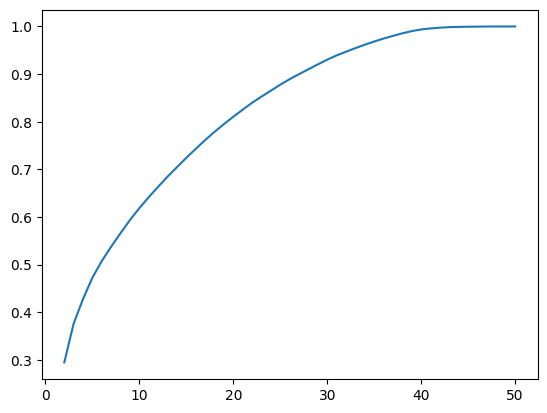

In [50]:
# plotting variance ratio
pd.Series(var_ratio).plot()

In [51]:
! pip install kneed

<Figure size 500x500 with 0 Axes>

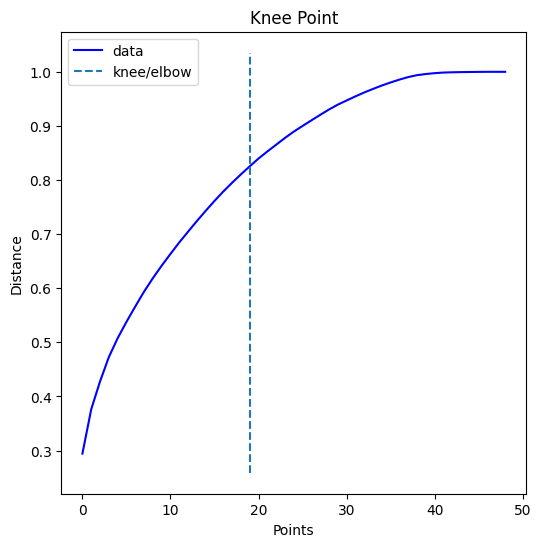

Knee Locator k = 21


In [52]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [53]:
# Reducing the dimensions of the data
pca_final=PCA(n_components=21,random_state=42).fit(X_res)

reduced=pca_final.fit_transform(X_pca)

In [54]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(reduced, y)

In [55]:
# Training all models
report_pca = evaluate_models(X_res,y_res, models)

Model: Random Forest
Model performance for Test set
- Accuracy: 0.8684
- F1 score: 0.8509
- Precision: 0.9715
- Recall: 0.7569
- Roc Auc Score: 0.8675


Model: Decision Tree
Model performance for Test set
- Accuracy: 0.8335
- F1 score: 0.8301
- Precision: 0.8399
- Recall: 0.8206
- Roc Auc Score: 0.8334


Model: Gradient Boosting
Model performance for Test set
- Accuracy: 0.8681
- F1 score: 0.8498
- Precision: 0.9752
- Recall: 0.7531
- Roc Auc Score: 0.8671


Model: Logistic Regression
Model performance for Test set
- Accuracy: 0.8631
- F1 score: 0.8439
- Precision: 0.9711
- Recall: 0.7462
- Roc Auc Score: 0.8621


Model: K-Neighbors Classifier
Model performance for Test set
- Accuracy: 0.8692
- F1 score: 0.8526
- Precision: 0.9660
- Recall: 0.7630
- Roc Auc Score: 0.8683


Model: XGBClassifier
Model performance for Test set
- Accuracy: 0.8741
- F1 score: 0.8623
- Precision: 0.9427
- Recall: 0.7945
- Roc Auc Score: 0.8735


Model: CatBoosting Classifier
Model performance for Test set
- 

### Report for PCA and Mean imputed data

In [56]:
report_pca

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC
5,XGBClassifier,0.874144,0.862256,0.942675,0.794479,0.873484
6,CatBoosting Classifier,0.873764,0.857511,0.973684,0.766104,0.872871
4,K-Neighbors Classifier,0.869202,0.852614,0.966019,0.763037,0.868321
0,Random Forest,0.868441,0.850862,0.971457,0.756902,0.867516
2,Gradient Boosting,0.868061,0.849849,0.975174,0.753067,0.867107
7,AdaBoost Classifier,0.866920,0.849268,0.968566,0.756135,0.866001
3,Logistic Regression,0.863118,0.843886,0.971058,0.746166,0.862148
1,Decision Tree,0.833460,0.830101,0.839874,0.820552,0.833353


In [57]:
from prettytable import PrettyTable

pt=PrettyTable()
pt.field_names=["Model","Imputation_method","F1 Score"]
pt.add_row(["CatBoost Classifier","Simple Imputer-Constant","89.29%"])
pt.add_row(['Random Forest','Simple Imputer-Median','88.50%'])
pt.add_row(['CatBoost Classfier','Simple Imputer-Mean','88.50%'])
pt.add_row(['Random Forest','Mice','88.42%'])
pt.add_row(['CatBoost Classifier','PCA','87.63%'])
pt.add_row(['CatBoost Classfier','Knn-Imputer','87.42%'])
print(pt)

+---------------------+-------------------------+----------+
|        Model        |    Imputation_method    | F1 Score |
+---------------------+-------------------------+----------+
| CatBoost Classifier | Simple Imputer-Constant |  89.29%  |
|    Random Forest    |  Simple Imputer-Median  |  88.50%  |
|  CatBoost Classfier |   Simple Imputer-Mean   |  88.50%  |
|    Random Forest    |           Mice          |  88.42%  |
| CatBoost Classifier |           PCA           |  87.63%  |
|  CatBoost Classfier |       Knn-Imputer       |  87.42%  |
+---------------------+-------------------------+----------+


In [58]:
final_model = CatBoostClassifier(verbose=False)
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority', n_jobs=-1 )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_const, y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [60]:
print("Final CatBoost Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final CatBoost Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final CatBoost Classifier Accuracy Score (Train) : 0.9617900824879112
Final CatBoost Classifier Accuracy Score (Test) : 0.8862343572241184


## The best Model is CatBoost Classifier with 96.17% accuracy

### Display the confusion Matrix

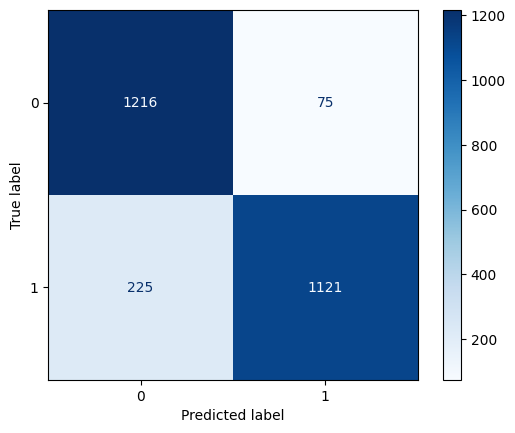

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compute confusion matrix
y_pred = final_model.predict(X_test)

# Create and plot the confusion matrix
cm_display = ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test, cmap='Blues', values_format='d')

# Show the plot
# cm_display.plot()


### Predict on the test datast and make a prediction.csv file

In [62]:
test= pd.read_csv('Assignment_Test.csv')
test.head()

,UID,DEALER ID,APPLICATION LOGIN DATE,HDB BRANCH NAME,HDB BRANCH STATE,FIRST NAME,MIDDLE NAME,LAST NAME,mobile,AADHAR VERIFIED,...,Phone Social Premium.rummycircle,Phone Social Premium.shaadi,Phone Social Premium.skype,Phone Social Premium.toi,Phone Social Premium.whatsapp,Phone Social Premium.yatra,Phone Social Premium.zoho,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,105615,07/12/22,HUBLI-SF,NaN,VENUGOPAL,H,BHARADHVAJ,7019759674,NO,...,NaN,0.0,0.0,0.0,0.0,NaN,0.0,676,100.0,Medium
1,1840349097823778816,91593,07/14/2022,SATNA-SF,MADHYA PRADESH,SHIVDHAR,NaN,CHAUDHARY,7697884828,NO,...,NaN,0.0,0.0,NaN,0.0,NaN,0.0,897,-1.0,Low
2,1488102613362294272,74152,07/07/22,LUCKNOW-SF,UTTAR PRADESH,MANISH,NaN,VERMA,8840079825,NO,...,NaN,0.0,1.0,0.0,1.0,NaN,0.0,839,100.0,Medium
3,555529923942874624,110164,07/13/2022,KOLLAM-SF,KERALA,DEEPU,RAVEENDRAN,RAVEENDRAN,8089276854,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,2050,-1.0,Low
4,1010213070486150912,113037,07/08/22,PURI-SF,ORISSA,AKASHA,NaN,PRADHAN,9337511958,NO,...,NaN,0.0,0.0,0.0,NaN,NaN,0.0,-1,-1.0,Very Low


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UID                                  2000 non-null   int64  
 1   DEALER ID                            2000 non-null   int64  
 2   APPLICATION LOGIN DATE               2000 non-null   object 
 3   HDB BRANCH NAME                      2000 non-null   object 
 4   HDB BRANCH STATE                     1828 non-null   object 
 5   FIRST NAME                           2000 non-null   object 
 6   MIDDLE NAME                          595 non-null    object 
 7   LAST NAME                            1869 non-null   object 
 8   mobile                               2000 non-null   int64  
 9   AADHAR VERIFIED                      2000 non-null   object 
 10  Cibil Score                          1158 non-null   object 
 11  MOBILE VERIFICATION           

### Apply all the Preprocessing techniques on Test dataset

In [64]:
## Remove these columns because these columns have lot of missing values and irrelantive columns.
test.drop(columns=['MIDDLE NAME','Phone Social Premium.a23games','Phone Social Premium.isWABusiness',
                    'Phone Social Premium.jiomart','Phone Social Premium.my11','Phone Social Premium.rummycircle',
                    'Phone Social Premium.whatsapp','Phone Social Premium.yatra'],axis=1,inplace=True)
test= test.drop_duplicates(keep='first')

In [65]:
from dateutil import parser

test['APPLICATION LOGIN DATE'] = test['APPLICATION LOGIN DATE'].apply(lambda date_str: parser.parse(date_str))
test['DOB'] = pd.to_datetime(test['DOB'])

In [66]:
test['Phone Social Premium.amazon'] = test['Phone Social Premium.amazon'].astype('object')
test['Phone Social Premium.byjus'] = test['Phone Social Premium.byjus'].astype('object')
test['Phone Social Premium.flipkart'] = test['Phone Social Premium.flipkart'].astype('object')
test['Phone Social Premium.housing'] = test['Phone Social Premium.housing'].astype('object')
test['Phone Social Premium.indiamart'] = test['Phone Social Premium.indiamart'].astype('object')
test['Phone Social Premium.instagram'] = test['Phone Social Premium.instagram'].astype('object')
test['Phone Social Premium.jeevansaathi'] = test['Phone Social Premium.jeevansaathi'].astype('object')
test['Phone Social Premium.microsoft'] = test['Phone Social Premium.microsoft'].astype('object')
test['Phone Social Premium.paytm'] = test['Phone Social Premium.paytm'].astype('object')
test['Phone Social Premium.skype'] = test['Phone Social Premium.skype'].astype('object')
test['Phone Social Premium.shaadi'] = test['Phone Social Premium.shaadi'].astype('object')
test['Phone Social Premium.toi'] = test['Phone Social Premium.toi'].astype('object')
test['Phone Social Premium.zoho'] = test['Phone Social Premium.zoho'].astype('object')

In [67]:
test['ASSET CTG'] = np.where(test['ASSET CTG'].isin(['MCECA','SCECA','MCEXA']), test['ASSET CTG'], 'Others')
test['PRIMARY ASSET MAKE'] = np.where(test['PRIMARY ASSET MAKE'].isin(['HERO MOTORS','HONDA MOTORS',
                                                                         'TVS MOTOR CO','BAJAJ AUTO INDIA',
                                                                         'SUZUKI MOTORCYCLE','YAMAHA MOTOR']), test['PRIMARY ASSET MAKE'], 'Others')
test['ADDRESS TYPE'] = test['ADDRESS TYPE'].replace({
    'Self/Spouse Owned': 'Owned',
    'OWNED-BUNGLOW': 'Owned',
    'OWNED-PENTHOUSE': 'Owned',
    'OWNDED-FLAT':'Owned',
    'OWNED-ROWHOUSE':'Owned',
    'Parental': 'Parental',
    'PARENT OWNED-HOUSE' : 'Parental',
    'PARENT OWNED-FLAT' : 'Parental',
    'Rented': 'Rented',
    'Company Provided' : 'Rented',
    'RENTED-ROWHOUSE': 'Rented',
})

# Replace zero values with NaN
test['AGE'] = test['AGE'].replace(0, np.nan)

# Define bins based on the age distribution
bins = [17, 25, 35, 45, 55, 65, np.inf]  # Adjust the ranges according to the distribution
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']  # Labels for the bins

# Perform binning on the age column
test['AGE'] = pd.cut(test['AGE'], bins=bins, labels=labels, right=True)
test['AGE'] = test['AGE'].astype('object')

# Convert the Cibil Score column to numeric, forcing errors to NaN
test['Cibil Score'] = pd.to_numeric(test['Cibil Score'], errors='coerce')

# Define bins and labels for Cibil Score
cibil_bins = [300, 550, 650, 750, 850]  # Adjust the ranges as needed
cibil_labels = ['Poor', 'Fair', 'Good', 'Excellent']

# Perform binning on the cleaned Cibil Score column
test['Cibil Score'] = pd.cut(test['Cibil Score'], bins=cibil_bins, labels=cibil_labels, right=True)
test['Cibil Score'] = test['Cibil Score'].astype('object')


# AADHAR VERIFIED, MOBILE VERIFICATION,zoho, shaadi, jeevansaathi, indiamart, housing,
test = test.drop(columns=['AADHAR VERIFIED','MOBILE VERIFICATION', 'Phone Social Premium.zoho',
                            'Phone Social Premium.shaadi','Phone Social Premium.jeevansaathi',
                            'Phone Social Premium.indiamart','Phone Social Premium.housing'])

In [68]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [69]:
import category_encoders as ce

# Specify the columns you want to apply binary encoding to
binary_columns = ['HDB BRANCH STATE', 'MARITAL STATUS', 'GENDER','AGE', 'ADDRESS TYPE',
                                    'EMPLOY CONSTITUTION', 'EMPLOYER TYPE','ASSET CTG','ASSET MODEL NO','PRIMARY ASSET MAKE']

# Initialize BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=binary_columns)

# Fit and transform the train data
test = binary_encoder.fit_transform(test)


test['Cibil Score'] = test['Cibil Score'].replace({"Poor":0,"Fair":1, "Good":3, "Excellent":4})
test['phone_phoneFootprintStrengthOverall'] = test['phone_phoneFootprintStrengthOverall'].replace({"Very Low":1, "Low":1,"Medium":2,"High":3,"Very High":4})
# test['Application Status'] = test['Application Status'].replace({"APPROVED":1,"DECLINED":0})



test=test.drop(columns=['DEALER ID','APPLICATION LOGIN DATE','HDB BRANCH NAME','FIRST NAME',
                    'LAST NAME','DEALER NAME','Personal Email Address', 'EMPLOYER NAME','Primary Asset Model No',
                    'DOB','Pan Name', 'name', 'vpa', 'upi_name'])

In [70]:
test.head()

,UID,HDB BRANCH STATE_0,HDB BRANCH STATE_1,HDB BRANCH STATE_2,HDB BRANCH STATE_3,HDB BRANCH STATE_4,mobile,Cibil Score,TOTAL ASSET COST,ASSET CTG_0,...,Phone Social Premium.byjus,Phone Social Premium.flipkart,Phone Social Premium.instagram,Phone Social Premium.microsoft,Phone Social Premium.paytm,Phone Social Premium.skype,Phone Social Premium.toi,phone_digitalage,phone_nameMatchScore,phone_phoneFootprintStrengthOverall
0,1844045271814558464,1,1,0,0,1,7019759674,4.0,95352.0,0,...,0.0,0.0,NaN,0.0,1.0,0.0,0.0,676,100.0,2.0
1,1840349097823778816,0,0,0,0,1,7697884828,3.0,75371.0,0,...,0.0,0.0,NaN,0.0,0.0,0.0,NaN,897,-1.0,1.0
2,1488102613362294272,0,0,0,1,0,8840079825,3.0,94983.0,0,...,0.0,1.0,NaN,1.0,1.0,1.0,0.0,839,100.0,2.0
3,555529923942874624,0,0,0,1,1,8089276854,3.0,NaN,0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,2050,-1.0,1.0
4,1010213070486150912,0,0,1,0,0,9337511958,NaN,90277.0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-1,-1.0,1.0


In [71]:
test.shape

(2000, 50)

### Predict on the test dataset

In [72]:
test_predictions = final_model.predict(test)

In [73]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for imbalanced datasets

# Print accuracy and F1 score
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Create a DataFrame with the predictions
prediction_df = pd.DataFrame({
    'ID': test['UID'],  # Assuming the test data has an 'ID' column for identification
    'Predicted': test_predictions
})

Accuracy: 0.8862
F1 Score: 0.8860


In [74]:
# Save the predictions to a CSV file
prediction_df.to_csv('prediction.csv', index=False)